<a href="https://colab.research.google.com/github/fidelatrstyni/PCVK_Genap_2021/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Praktikum

### 1. Gamma Correction

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Gamma correction pada citra
---------------------------------
Masukkan nilai Gamma: 3


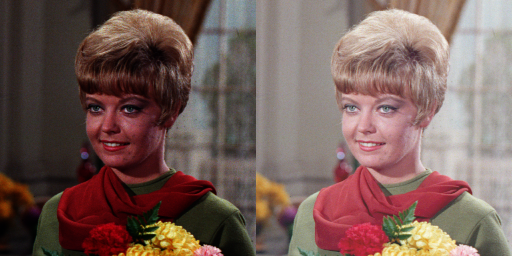

In [3]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print('Gamma correction pada citra')
print('---------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c]/255,(1/gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

### 3. Buat modul Average Denoising

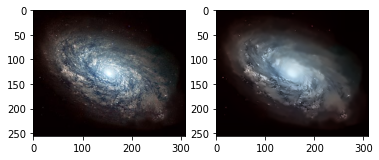

In [8]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')

dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)

plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(dst)
plt.show()

In [44]:
import glob
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
cv_img = []
for img in glob.glob("/content/drive/MyDrive/PCVK/noises/*.jpg"):
    n= cv2.imread(img)
    cv_img.append(n)

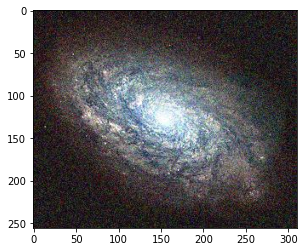

In [40]:
plt.imshow(cv_img[5])

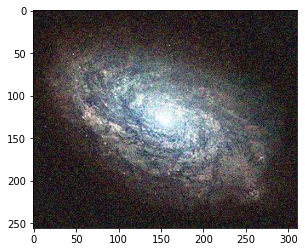

In [41]:
plt.imshow(cv_img[30])

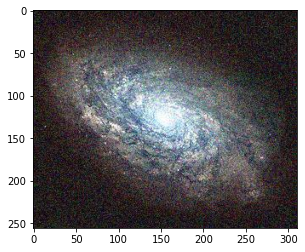

In [42]:
plt.imshow(cv_img[60])

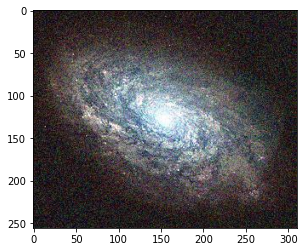

In [45]:
plt.imshow(cv_img[0])

20.181887401739562


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  import sys


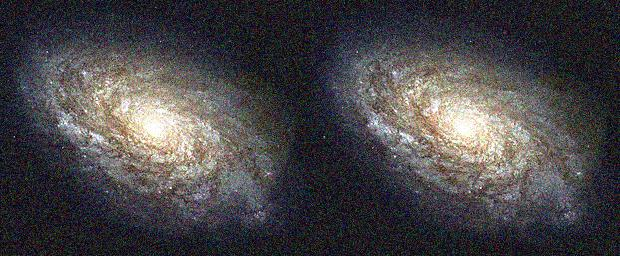

In [48]:
import numpy as np
from skimage.measure import compare_psnr
 
ref_img = cv_img[0]
noisy_img = cv_img[5]
 
PSNR = compare_psnr(ref_img,noisy_img)
print(PSNR)

final_frame = cv.hconcat((ref_img, noisy_img))
cv2_imshow(final_frame)

20.200716780016286


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  after removing the cwd from sys.path.


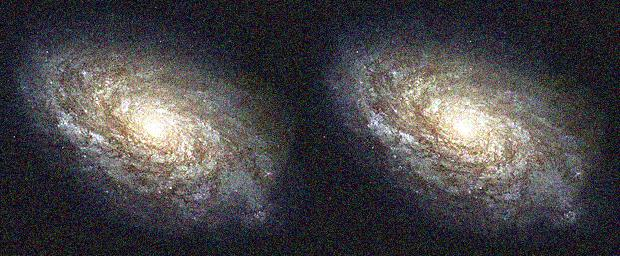

In [49]:
ref_img = cv_img[0]
noisy_img = cv_img[30]
 
PSNR = compare_psnr(ref_img,noisy_img)
print(PSNR)

final_frame = cv.hconcat((ref_img, noisy_img))
cv2_imshow(final_frame)

20.168288304532986


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  after removing the cwd from sys.path.


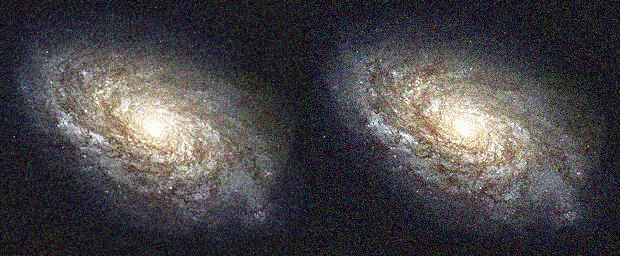

In [50]:
ref_img = cv_img[0]
noisy_img = cv_img[60]
 
PSNR = compare_psnr(ref_img,noisy_img)
print(PSNR)

final_frame = cv.hconcat((ref_img, noisy_img))
cv2_imshow(final_frame)

20.217317942907314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  after removing the cwd from sys.path.


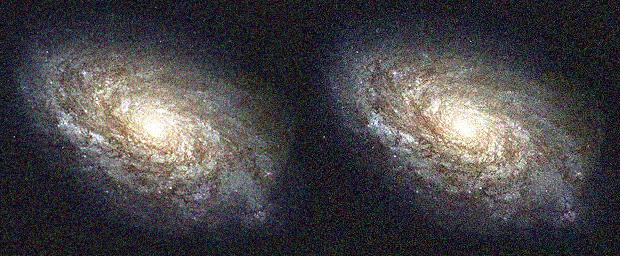

In [51]:
ref_img = cv_img[0]
noisy_img = cv_img[80]
 
PSNR = compare_psnr(ref_img,noisy_img)
print(PSNR)

final_frame = cv.hconcat((ref_img, noisy_img))
cv2_imshow(final_frame)

### 4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/teeth.jpg), sedangkan image kanan adalah hasilnya

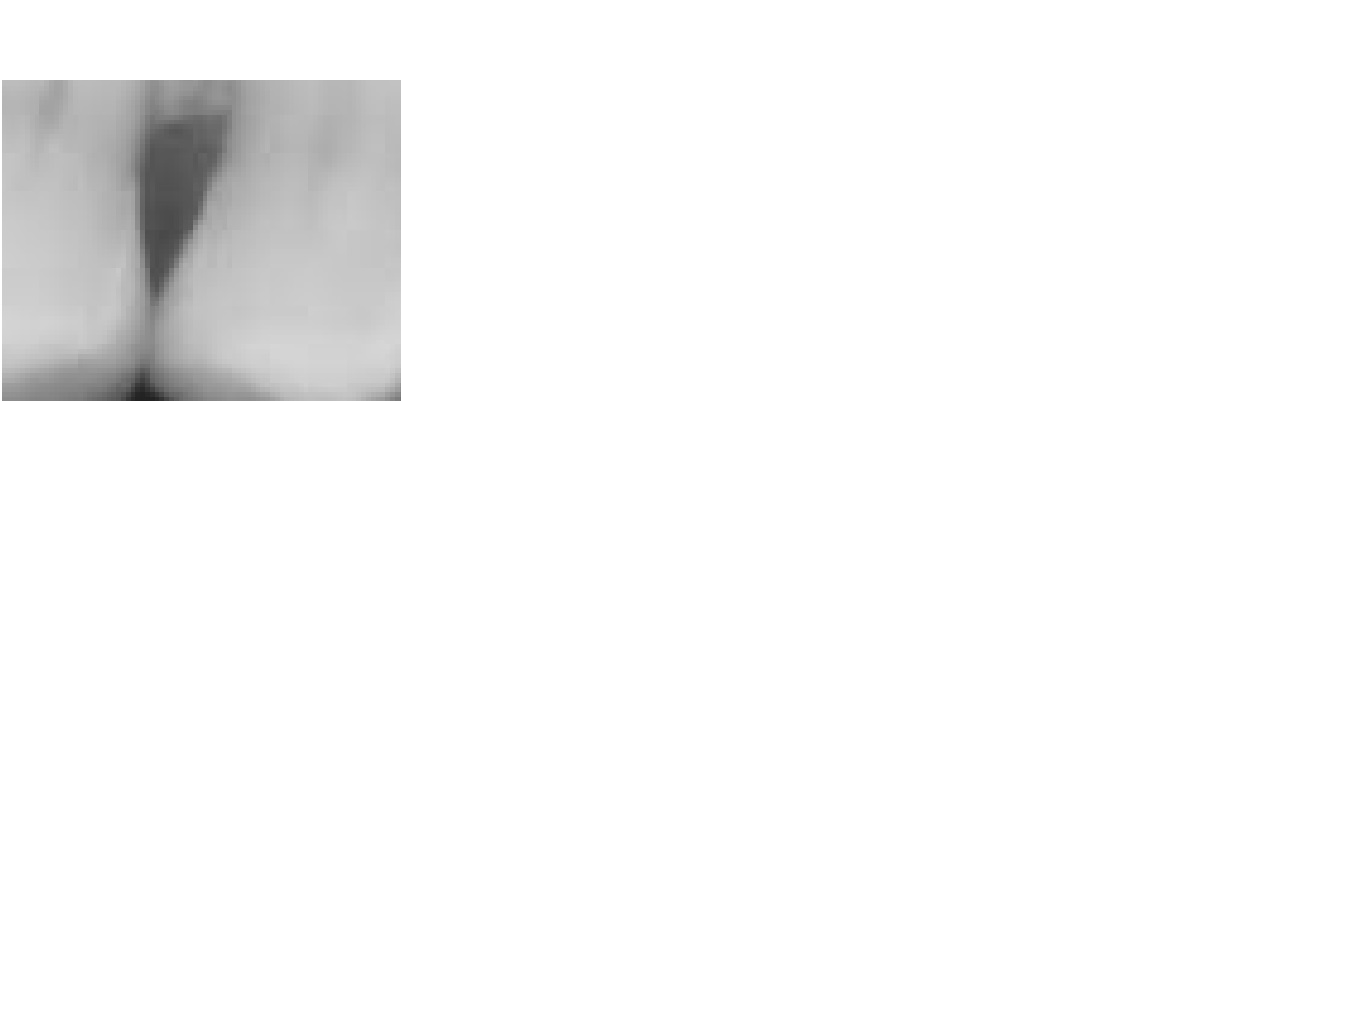

In [82]:
import numpy as np

# Load image, create mask, and draw white circle on mask
image = cv2.imread('/content/drive/MyDrive/PCVK/teeth.jpg')
mask = np.zeros(image.shape, dtype=np.uint8)
mask = cv2.rectangle(mask, (0, 80), (400, 400), (255,255,255), -1)


# Mask input image with binary mask
result = cv2.bitwise_and(image, mask)
# Color background white
result[mask==0] = 255 # Optional


cv2_imshow(result)

5.

Operator OR

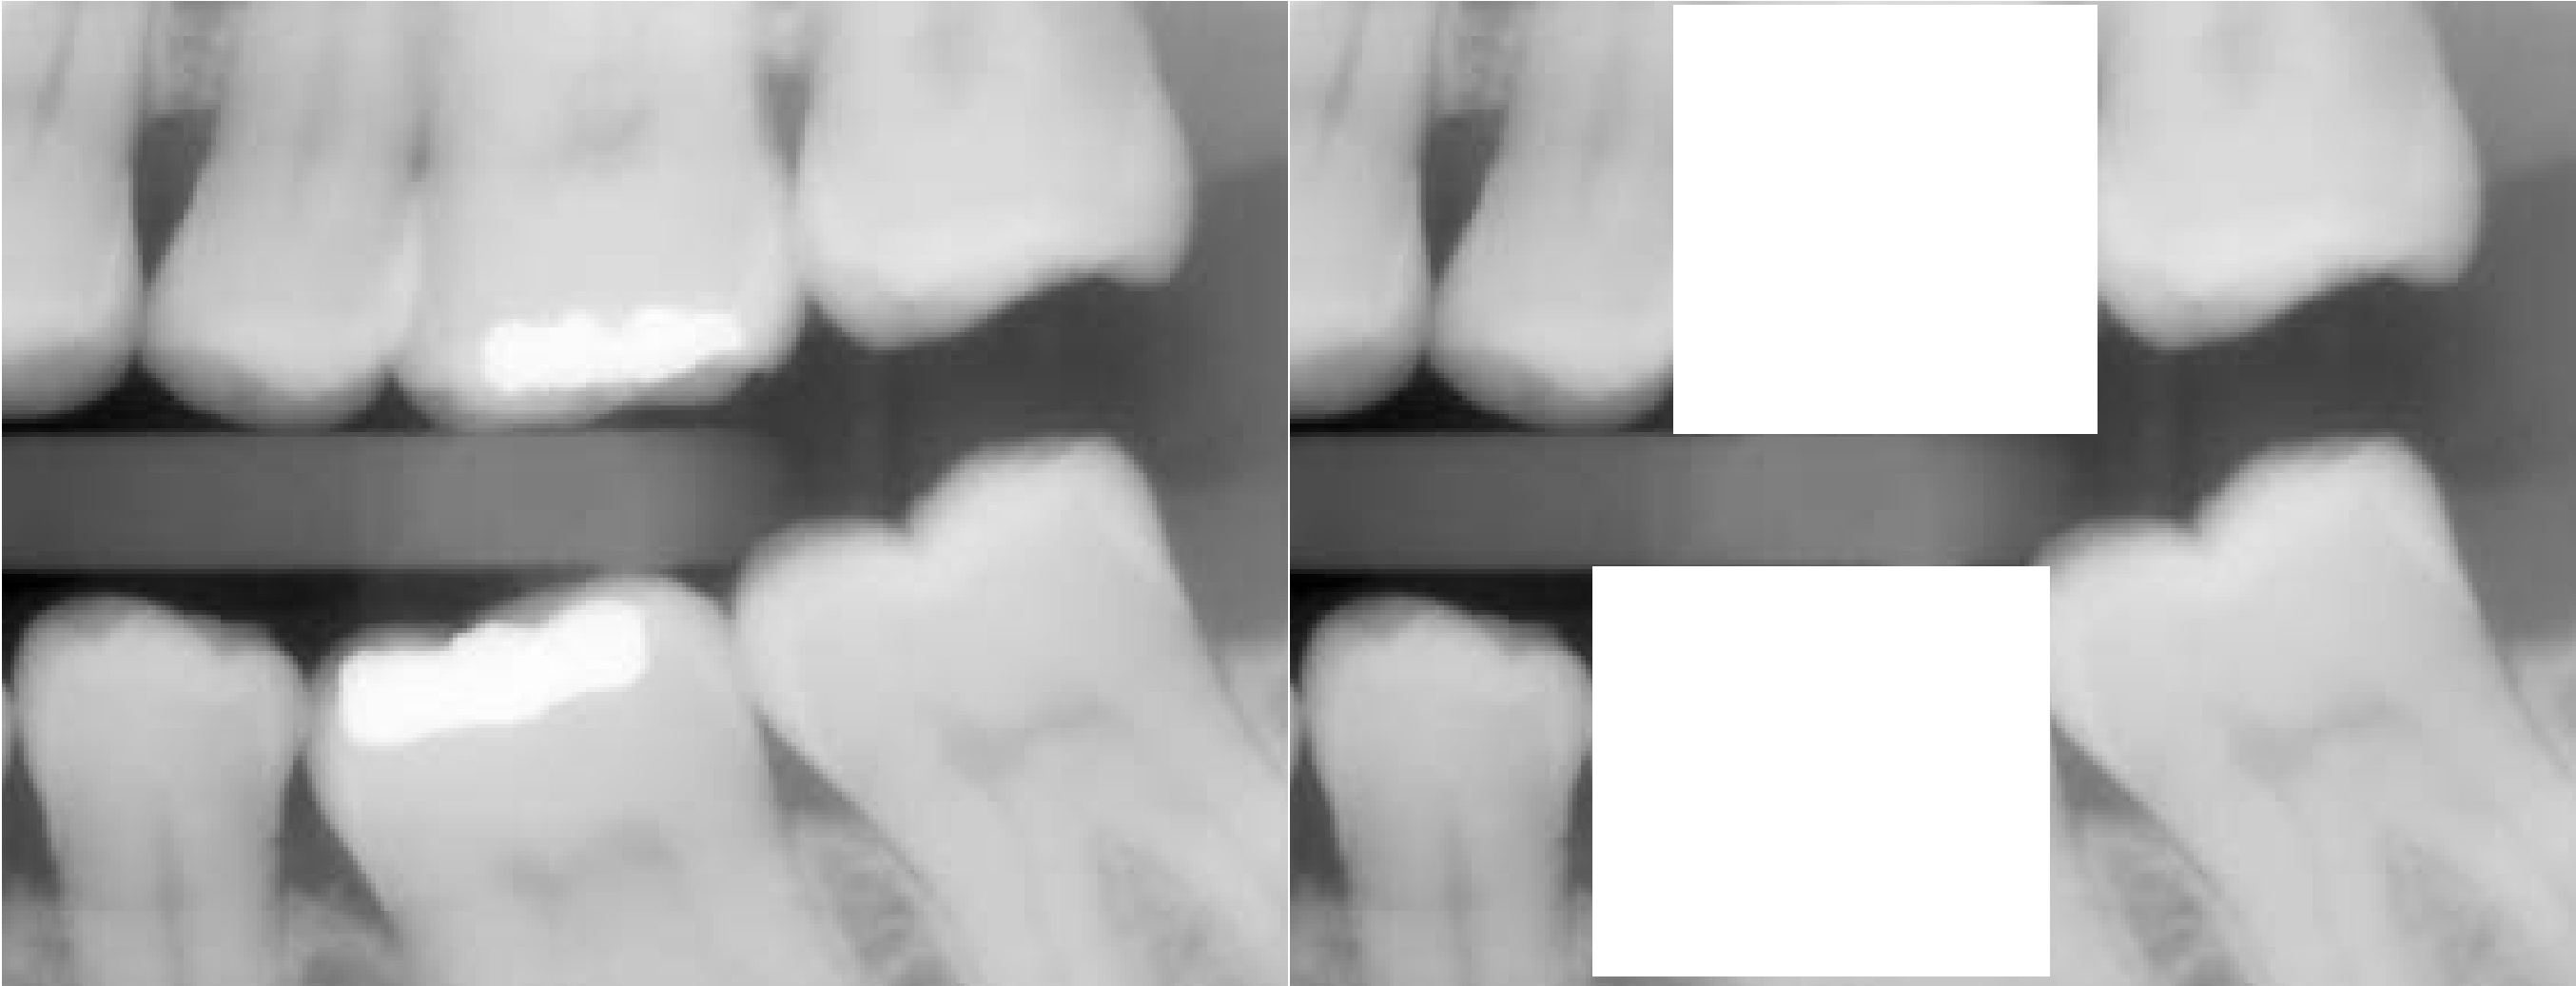

In [84]:
img = cv.imread('/content/drive/MyDrive/PCVK/teeth.jpg')
mask_or = np.zeros(img.shape, dtype=np.uint8)
mask_or = cv.rectangle(mask_or,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = img | mask_or

mask_or1 = cv.rectangle(mask_or,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result_or1 = img | mask_or1

final_frame = cv.hconcat((img, result_or1))
cv2_imshow(final_frame)

Operator NOT

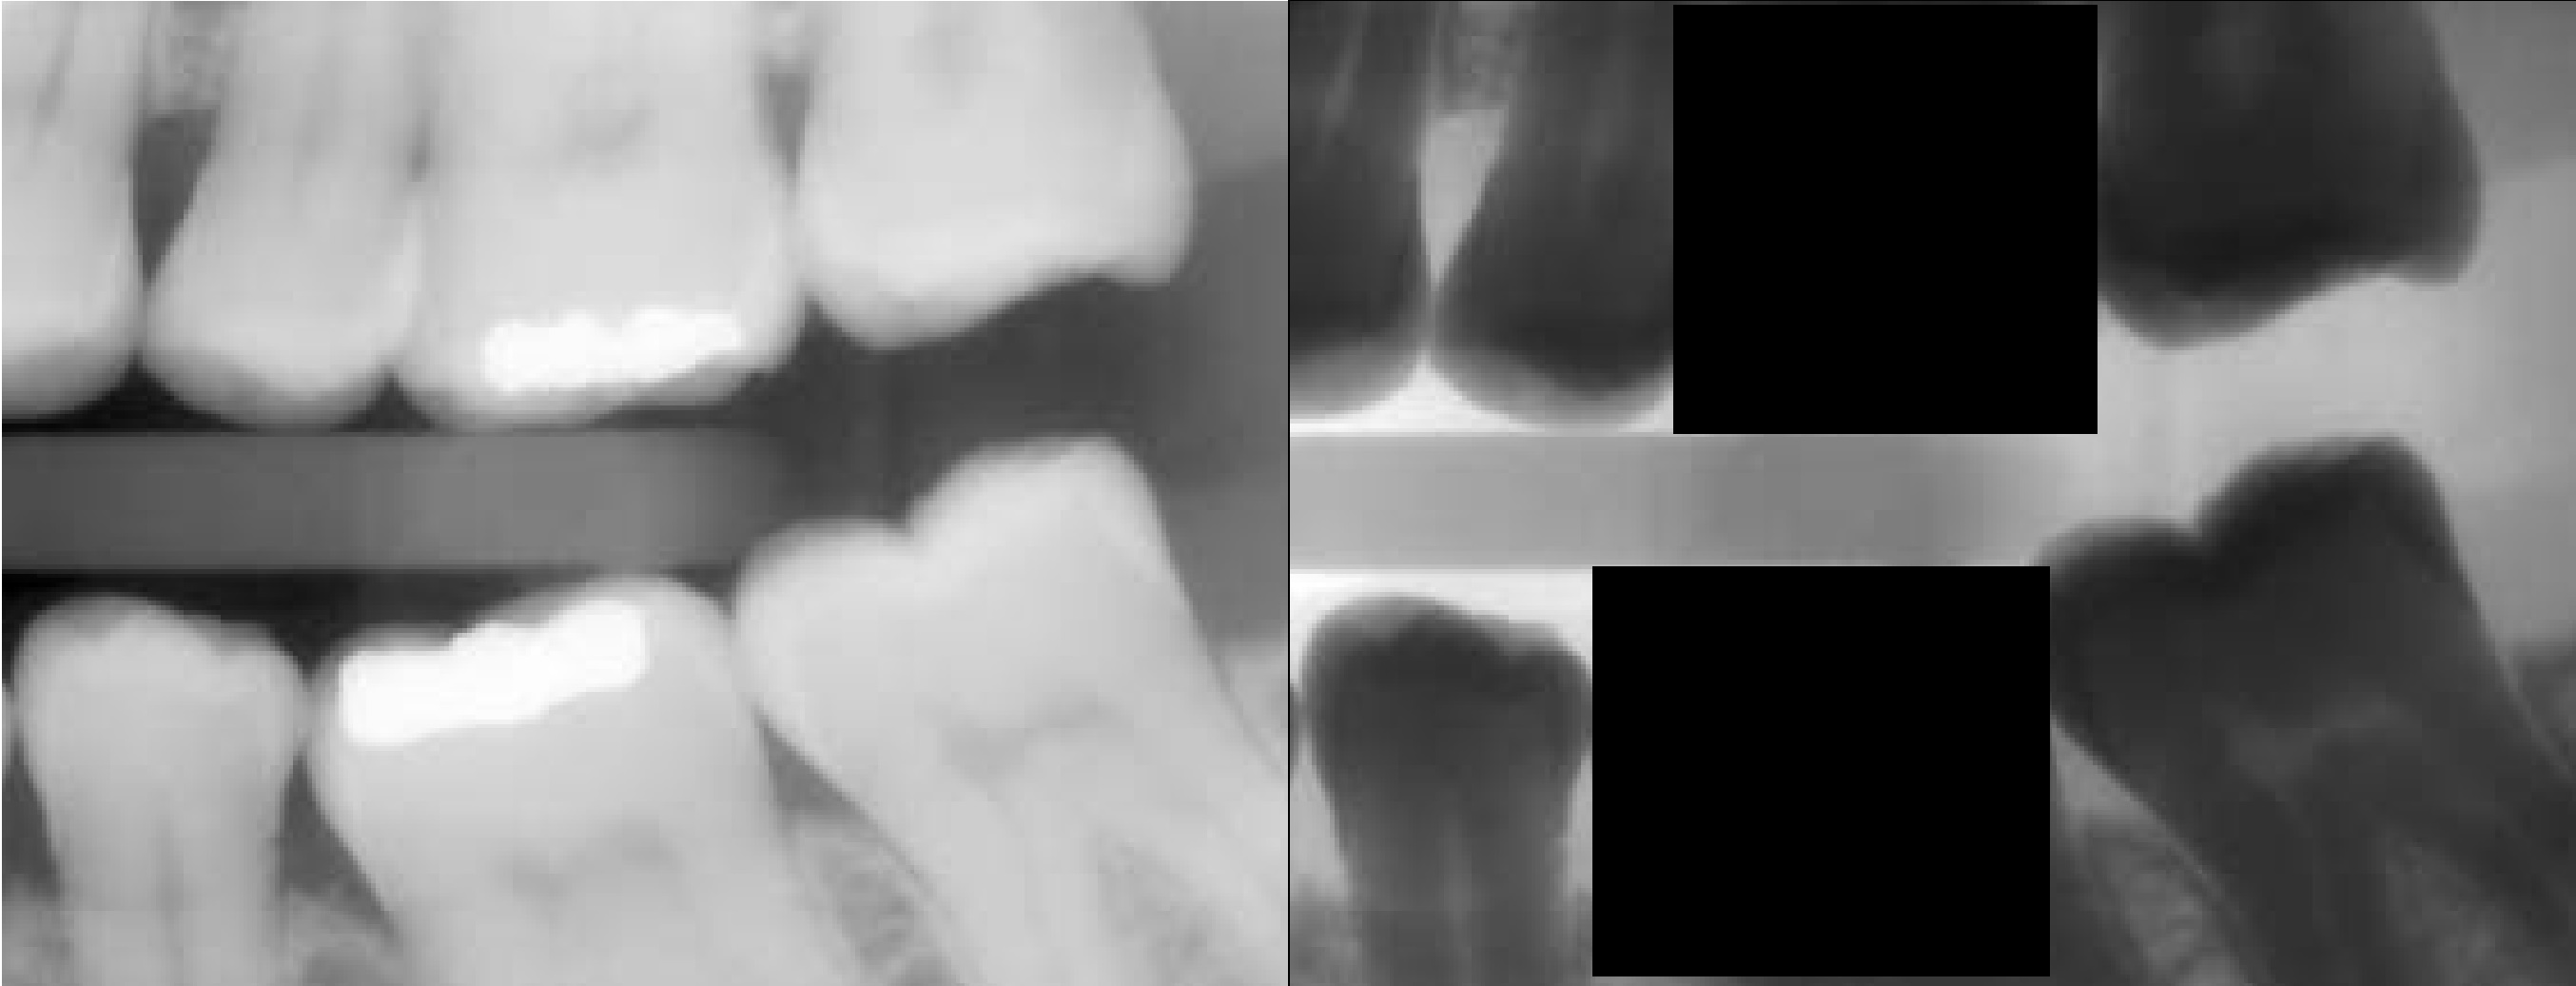

In [85]:
img = cv.imread('/content/drive/MyDrive/PCVK/teeth.jpg')
mask_not = np.zeros(img.shape, dtype=np.uint8)
mask_not = cv.rectangle(mask_not,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = ~img & ~mask_not

mask_not1 = cv.rectangle(mask_not,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result_not1 = ~img & ~mask_not1

final_frame = cv.hconcat((img, result_not1))
cv2_imshow(final_frame)